# ACCRE Project - Question 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
# Read in fullsample_cleaned.csv as a dataframe
jobs = pd.read_csv("../data/fullsample_cleaned.csv")

In [3]:
# Convert BEGIN and END columns in jobs df to datetime type
jobs['BEGIN'] = pd.to_datetime(jobs['BEGIN'])
jobs['END'] = pd.to_datetime(jobs['END'])

# Convert REQTIME, USEDTIME, JOBLENGTH columns in jobs df to timedelta type
jobs['REQTIME'] = pd.to_timedelta(jobs['REQTIME'])
jobs['USEDTIME'] = pd.to_timedelta(jobs['USEDTIME'])
jobs['JOBLENGTH'] = pd.to_timedelta(jobs['JOBLENGTH'])

# Count the amount of jobs per hour and create new column
jobs['GROUP1H'] = jobs.groupby(pd.Grouper(key='END',freq='H')).transform('count')['JOBID'].sort_index()

# Extract date and hour from 'END' column
jobs['DATE'] = jobs['END'].dt.date
jobs['HOUR'] = jobs['END'].dt.hour

# Create data frame with duplicates dropped by 'DATE' and 'HOUR' column
one_job_per_hour = jobs.drop_duplicates(['DATE', 'HOUR'])

## Question 1: Calculate some descriptive statistics for how many jobs per hour are being completed.

## To-Do List
1. Line Plot of Mean and Median
2. Box plot of hourly completions per month
3. Decide which graph is best for representing the median is more than the mean  (line graphs, stacked bar graphs, box plot, or combo)
4. More In Depth Look Into 3rd Week of September<br>
    a. Look at Memory Usage vs. Required Memory<br>
    b. States of Ended Jobs<br>
    c. Discuss about task utilization
    d. Decide on visualization that will best show this
    e. Look for other trends that could explain the high number of ended jobs in 3rd week of September

In [4]:
# Set fontsize
fontsize = 30

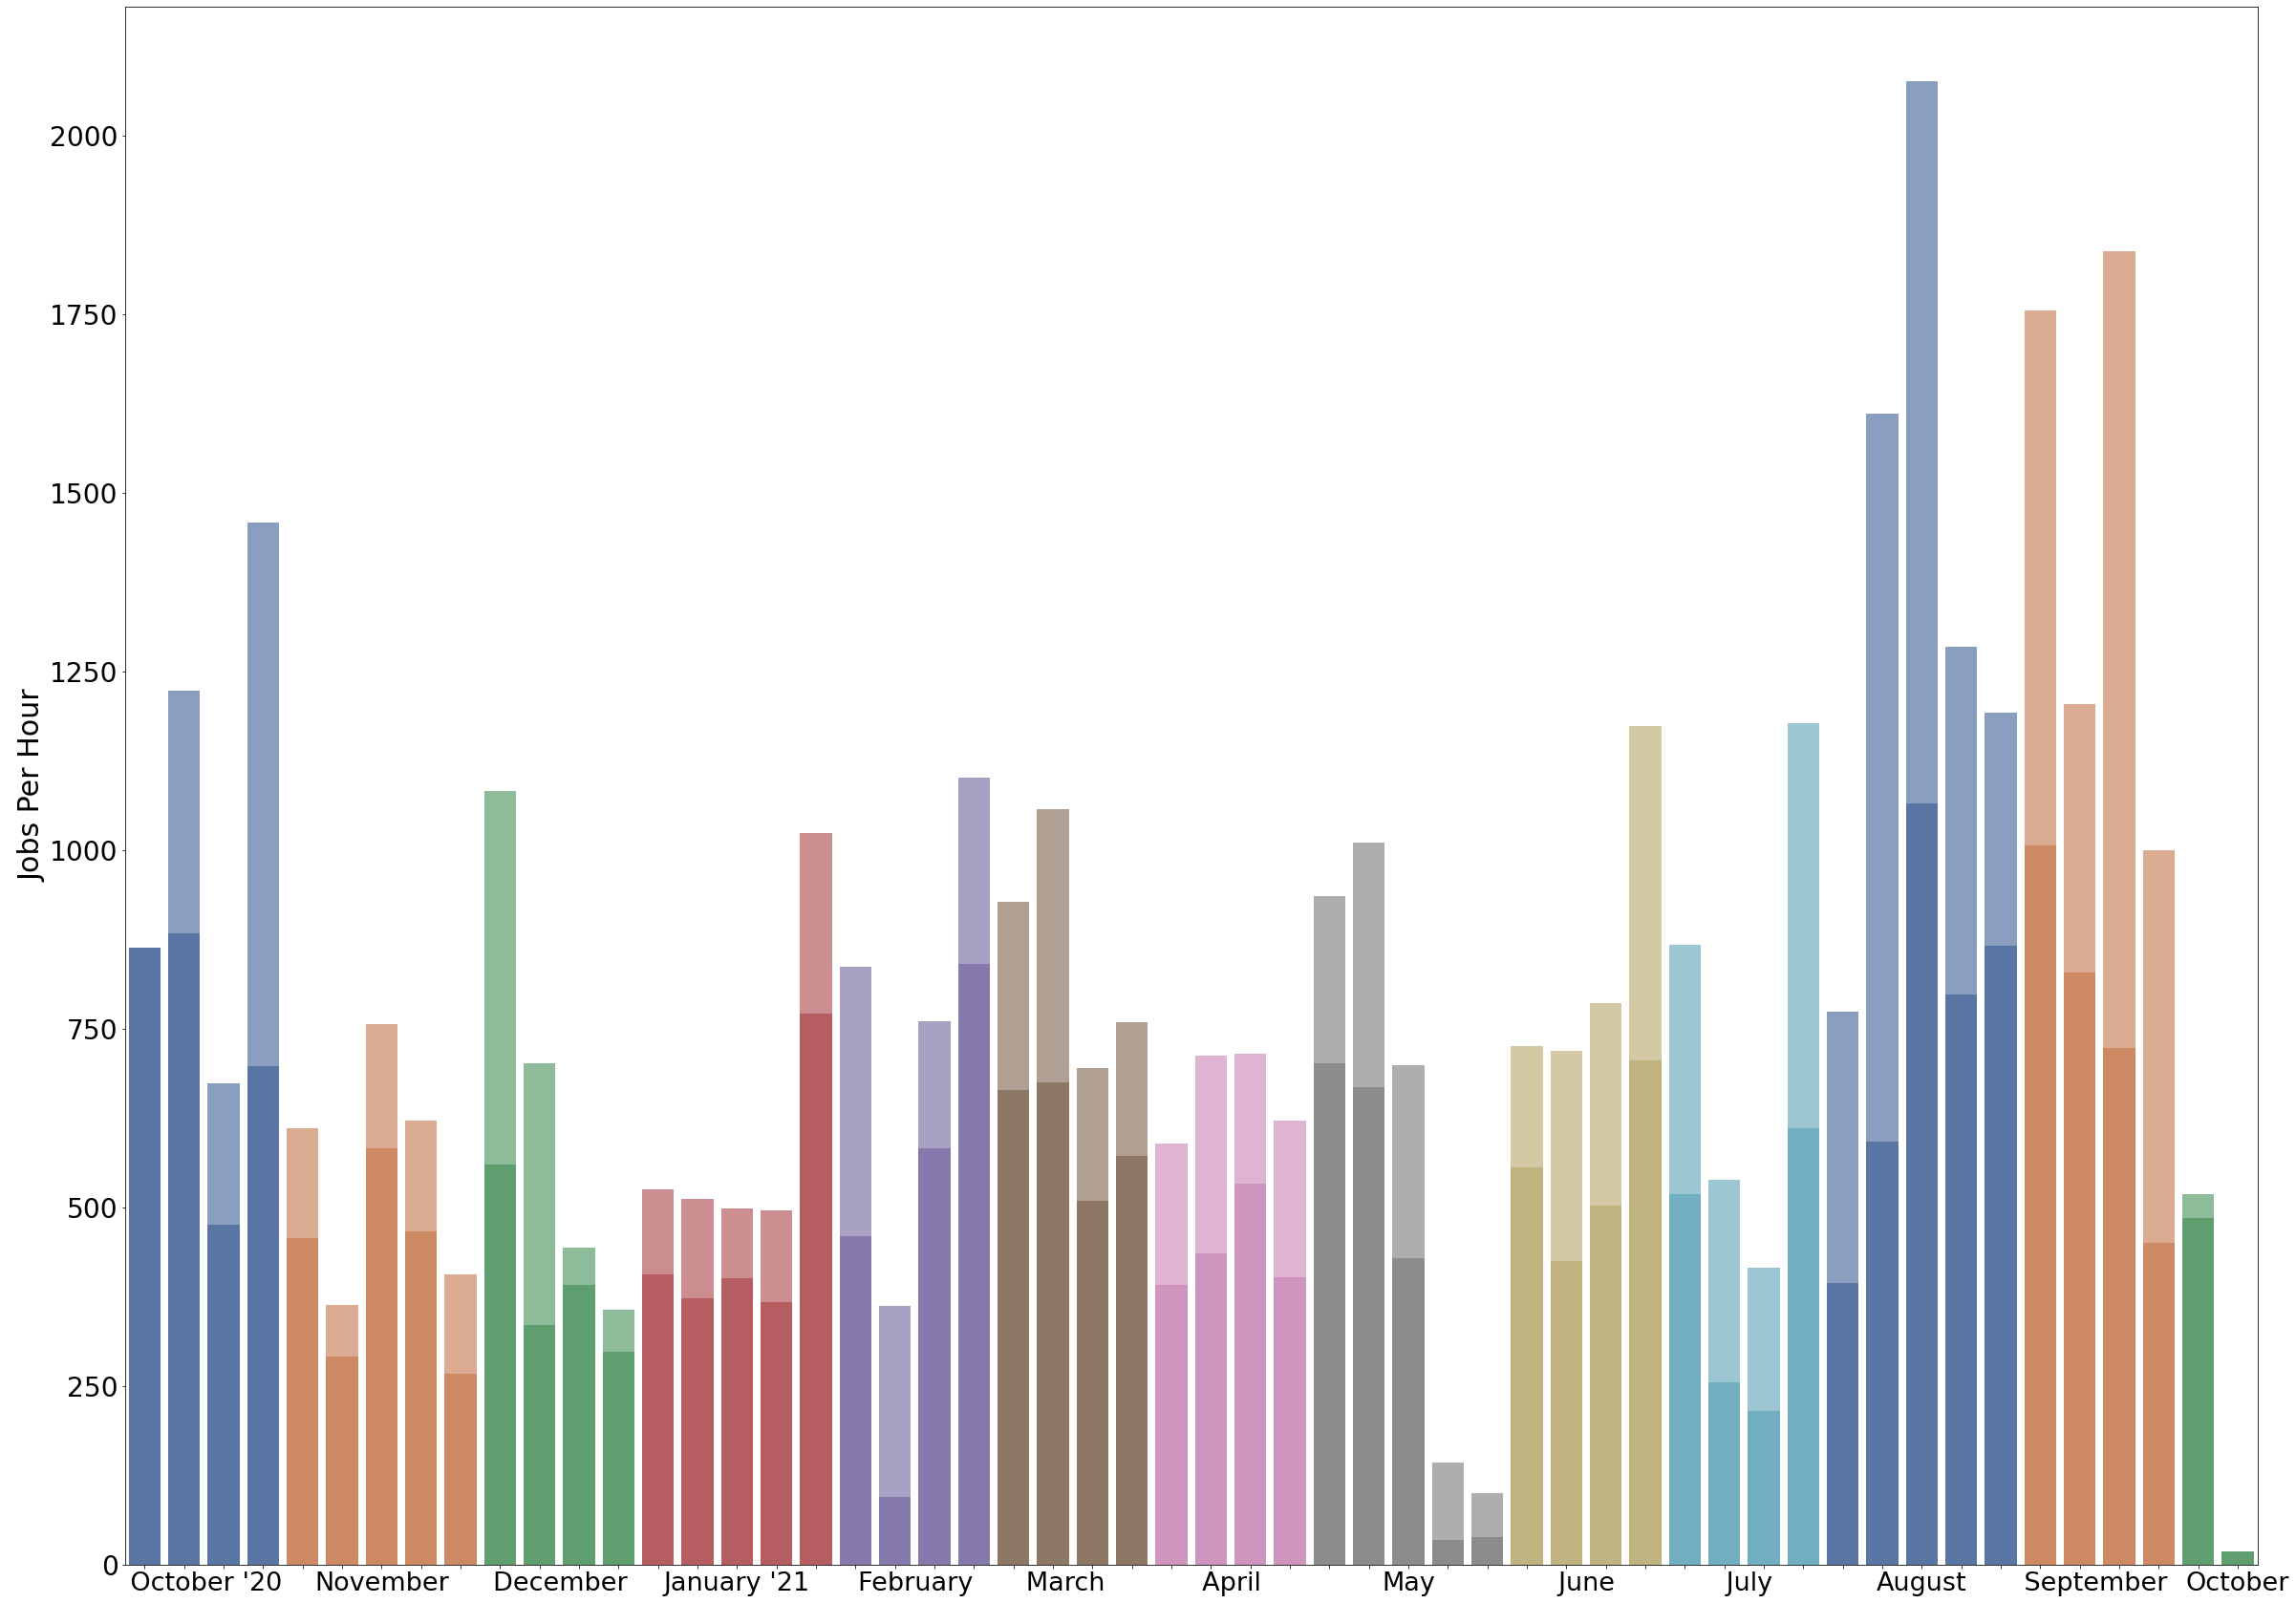

In [45]:
# Median jobs ended per hour each week
weekly_jobs_ended_by_hour_median = one_job_per_hour.groupby(pd.Grouper(key='END',freq='W')).median()
weekly_jobs_ended_by_hour_median = weekly_jobs_ended_by_hour_median.reset_index()

# Average(mean) jobs ended per hour each week
weekly_jobs_ended_by_hour_mean = jobs.groupby(pd.Grouper(key='END',freq='W')).count()/168
weekly_jobs_ended_by_hour_mean = weekly_jobs_ended_by_hour_mean.reset_index()

# Format date ticks for x axis
date_labels = weekly_jobs_ended_by_hour_median['END'].dt.strftime('%Y-%m')

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(40, 30))
sns.barplot(x = 'END', 
            y = 'GROUP1H', 
            data = weekly_jobs_ended_by_hour_median, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax)
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = weekly_jobs_ended_by_hour_mean, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax,
            alpha = 0.7)

# Set Axes labels and sizes
ax.set_xticklabels(["               October '20", "", "", "", "", "", "November", "", "", "", "     December", "", "", "", "", 
                    "January '21", "", "", "", "     February", "", "", "", "   March", "", "", "", "     April", "", "", 
                    "", "", "May", "", "", "", "     June", "", "", "", "      July", "", "", "", "", "August", "", "", "", 
                    "    September", "", "", "", "October"])
plt.xlabel('', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 3, rotation = 0)

plt.ylabel('Jobs Per Hour', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)

ax.get_legend().set_visible(False);

<ipython-input-48-e47e93da7677>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0", "10K", "20K", "30K", "40K"])


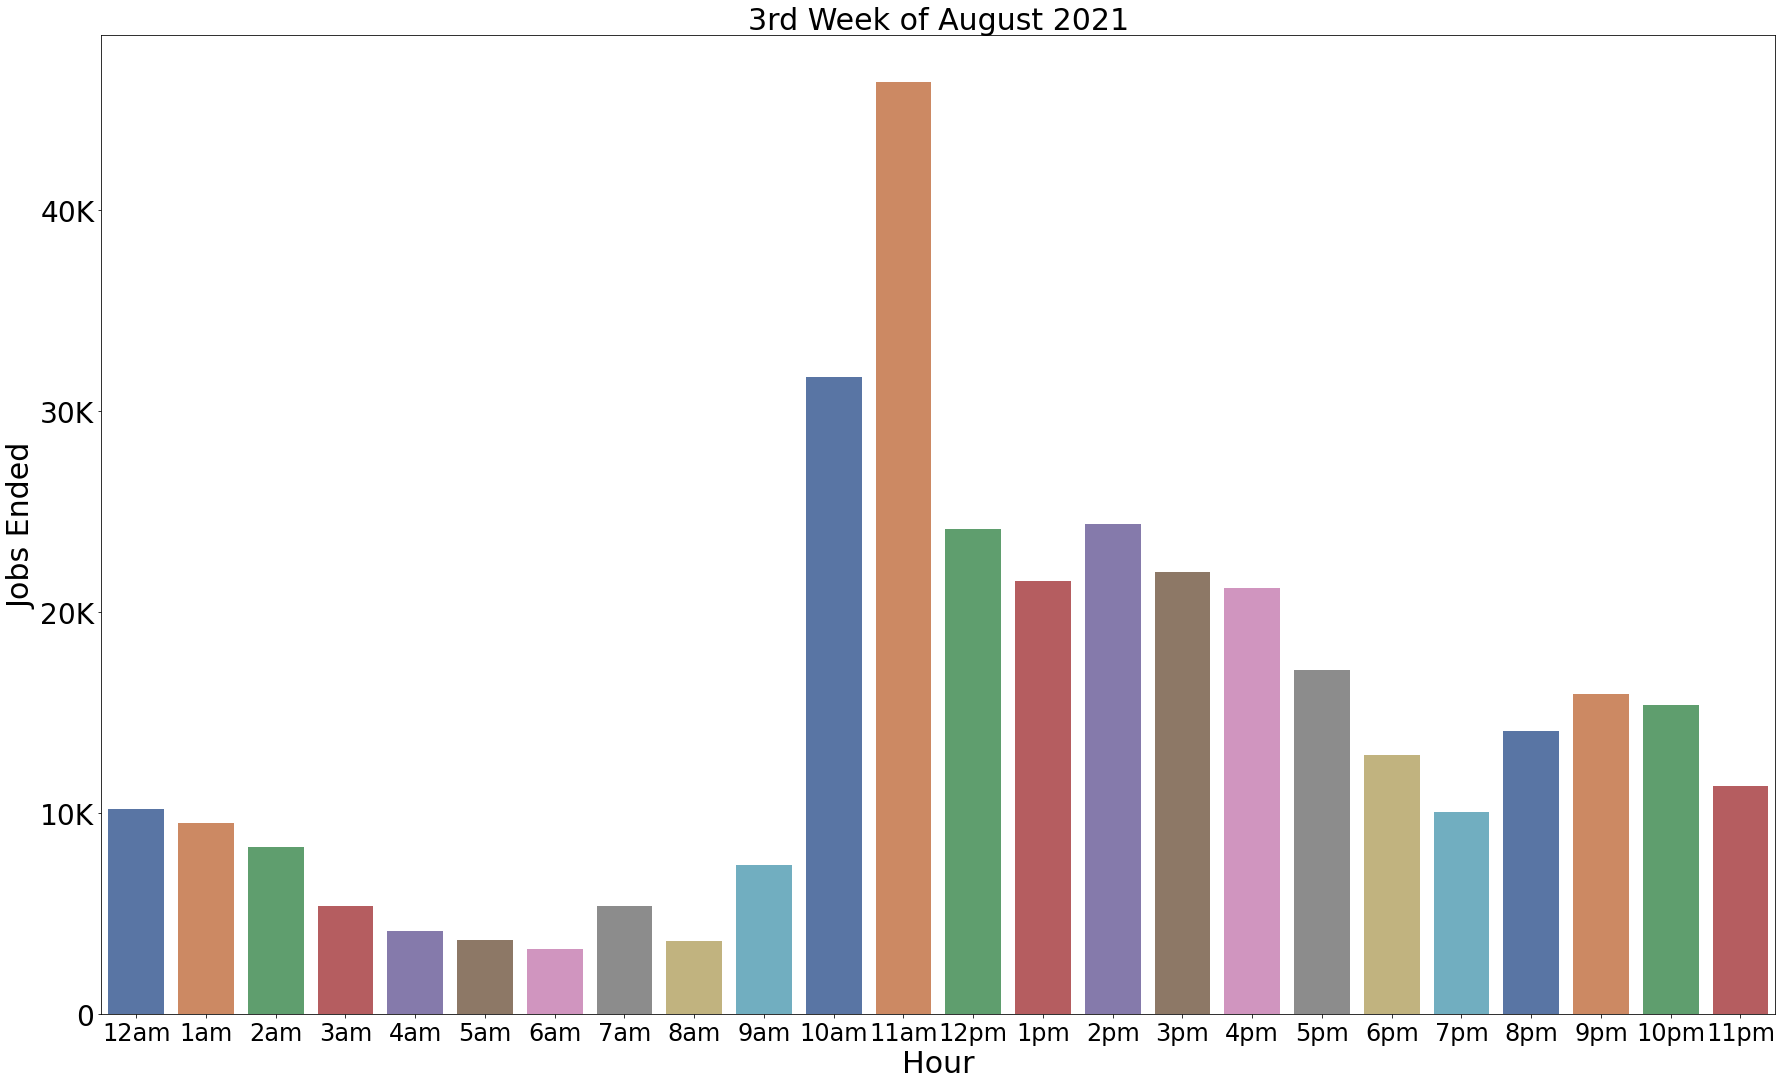

In [48]:
# Extract data for the third week of August
third_week_august = jobs[(jobs['END'].dt.date >= pd.to_datetime('2021-08-09')) 
                            & (jobs['END'].dt.date < pd.to_datetime('2021-08-16'))]

# Average(mean) jobs ended per hour for the third week in September
third_week_august_jobs_ended_by_hour = third_week_august.groupby(jobs['END'].dt.hour).count().drop({'END'}, axis='columns')
third_week_august_jobs_ended_by_hour = third_week_august_jobs_ended_by_hour.reset_index()

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30, 18))
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = third_week_august_jobs_ended_by_hour, 
            dodge = False, 
            palette = "deep",
            ax = ax)

# Set Axes labels and sizes
date_labels = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
plt.xlabel('Hour', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 6, rotation = 0)
ax.set_xticklabels(labels = date_labels)

plt.ylabel('Jobs Ended', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)
ax.set_yticklabels(["0", "10K", "20K", "30K", "40K"])

plt.title("3rd Week of August 2021", fontsize = fontsize);

<ipython-input-47-117dfe8ac4d9>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0", "50K", "100K", "150K", "200K", '250K', '300K', '350K', '400K'])


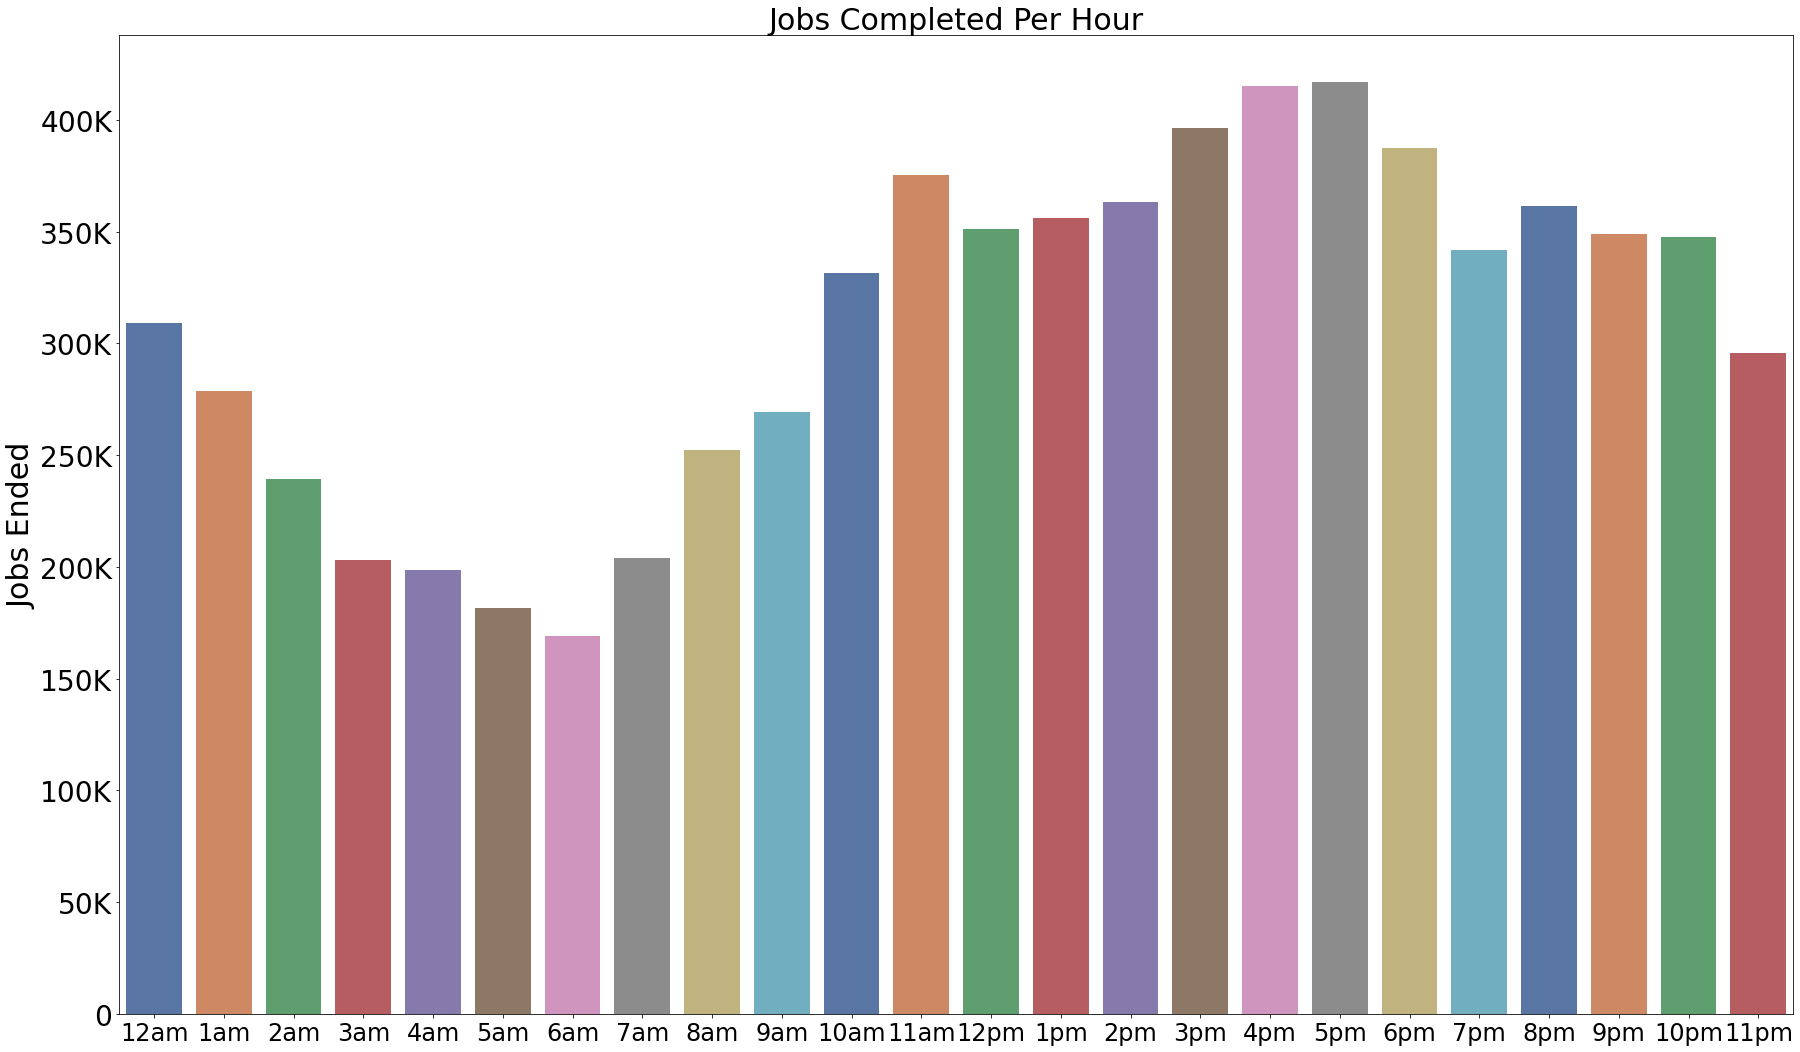

In [47]:
# Average(mean) jobs ended per hour for the third week in September
jobs_ended_by_hour = jobs.groupby(jobs['END'].dt.hour).count().drop({'END'}, axis='columns')
jobs_ended_by_hour = jobs_ended_by_hour.reset_index()

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30, 18))
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = jobs_ended_by_hour, 
            dodge = False, 
            palette = "deep",
            ax = ax)

# Set Axes labels and sizes
date_labels = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
plt.xlabel('', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 6, rotation = 0)
ax.set_xticklabels(labels = date_labels)

plt.ylabel('Jobs Ended', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)
ax.set_yticklabels(["0", "50K", "100K", "150K", "200K", '250K', '300K', '350K', '400K'])


plt.title("Jobs Completed Per Hour", fontsize = fontsize);

In [62]:
jobs['WEEK'] = jobs['END'].dt.isocalendar().week
jobs['YEAR'] = jobs['END'].dt.year

In [67]:
high_jobs = jobs.groupby(['YEAR', 'WEEK', 'HOUR']).count()
high_jobs[high_jobs['JOBID'] > 20000]

JOBID  STATE  BEGIN    END  REQMEM  USEDMEM  REQTIME  \
YEAR WEEK HOUR                                                         
2021 31   11    28483  28483  28483  28483   28483    28483    28483   
          12    22106  22106  22106  22106   22106    22106    22106   
          14    25442  25442  25442  25442   25442    25442    25442   
          16    24287  24287  24287  24287   24287    24287    24287   
     32   10    31705  31705  31705  31705   31705    31705    31705   
          11    46385  46385  46385  46385   46385    46385    46385   
          12    24147  24147  24147  24147   24147    24147    24147   
          13    21532  21532  21532  21532   21532    21532    21532   
          14    24380  24380  24380  24380   24380    24380    24380   
          15    21979  21979  21979  21979   21979    21979    21979   
          16    21186  21186  21186  21186   21186    21186    21186   
     33   17    23753  23753  23753  23753   23753    23753    23753   
     35   17    21505  21505  21505  21505   21505    21505    21505   
          18    21669  21669  21669  21669   21669    21669    21669   
          22    23713  23713  23713  23713   23713    23713    23713   
          23    20148  20148  20148  20148   20148    20148    20148   
     37   16    26791  26791  26791  26791   26791    26791    26791   
          17    29813  29813  29813  29813   29813    29813    29813   
          18    29788  29788  29788  29788   29788    29788    29788   
          19    29177  29177  29177  29177   29177    29177    29177   
          20    20510  20510  20510  20510   20510    20510    20510   
          21    25213  25213  25213  25213   25213    25213    25213   
          22    24288  24288  24288  24288   24288    24288    24288   

                USEDTIME  NODES   CPUS  PARTITION  EXITCODE  JOBLENGTH  \
YEAR WEEK HOUR                                                           
2021 31   11       28483  28483  28483      28483     28483      28483   
          12       22106  22106  22106      22106     22106      22106   
          14       25442  25442  25442      25442     25442      25442   
          16       24287  24287  24287      24287     24287      24287   
     32   10       31705  31705  31705      31705     31705      31705   
          11       46385  46385  46385      46385     46385      46385   
          12       24147  24147  24147      24147     24147      24147   
          13       21532  21532  21532      21532     21532      21532   
          14       24380  24380  24380      24380     24380      24380   
          15       21979  21979  21979      21979     21979      21979   
          16       21186  21186  21186      21186     21186      21186   
     33   17       23753  23753  23753      23753     23753      23753   
     35   17       21505  21505  21505      21505     21505      21505   
          18       21669  21669  21669      21669     21669      21669   
          22       23713  23713  23713      23713     23713      23713   
          23       20148  20148  20148      20148     20148      20148   
     37   16       26791  26791  26791      26791     26791      26791   
          17       29813  29813  29813      29813     29813      29813   
          18       29788  29788  29788      29788     29788      29788   
          19       29177  29177  29177      29177     29177      29177   
          20       20510  20510  20510      20510     20510      20510   
          21       25213  25213  25213      25213     25213      25213   
          22       24288  24288  24288      24288     24288      24288   

                REQMEMTOT  REQMEMPERCORE  USEDMEMTOT  GROUP1H   DATE  
YEAR WEEK HOUR                                                        
2021 31   11        28483          28483       28483    28483  28483  
          12        22106          22106       22106    22106  22106  
          14        25442          25442       25442    25442  25442  
         

In [51]:
jobs.groupby(pd.Grouper(key='END',freq=['W', 'H'])).count()

ValueError: Invalid frequency: ['W', 'H']

In [8]:
# Modify states cancelled by certain users to just say cancelled
third_week_august.loc[third_week_august['STATE'].str.find('CANCELLED') == 0, 'STATE'] = 'CANCELLED'

# Extract data for only jobs completed during 11am during thrid week of August
third_week_august_11_am = third_week_august[third_week_august['HOUR'] == 11]

C:\Users\hjrko\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


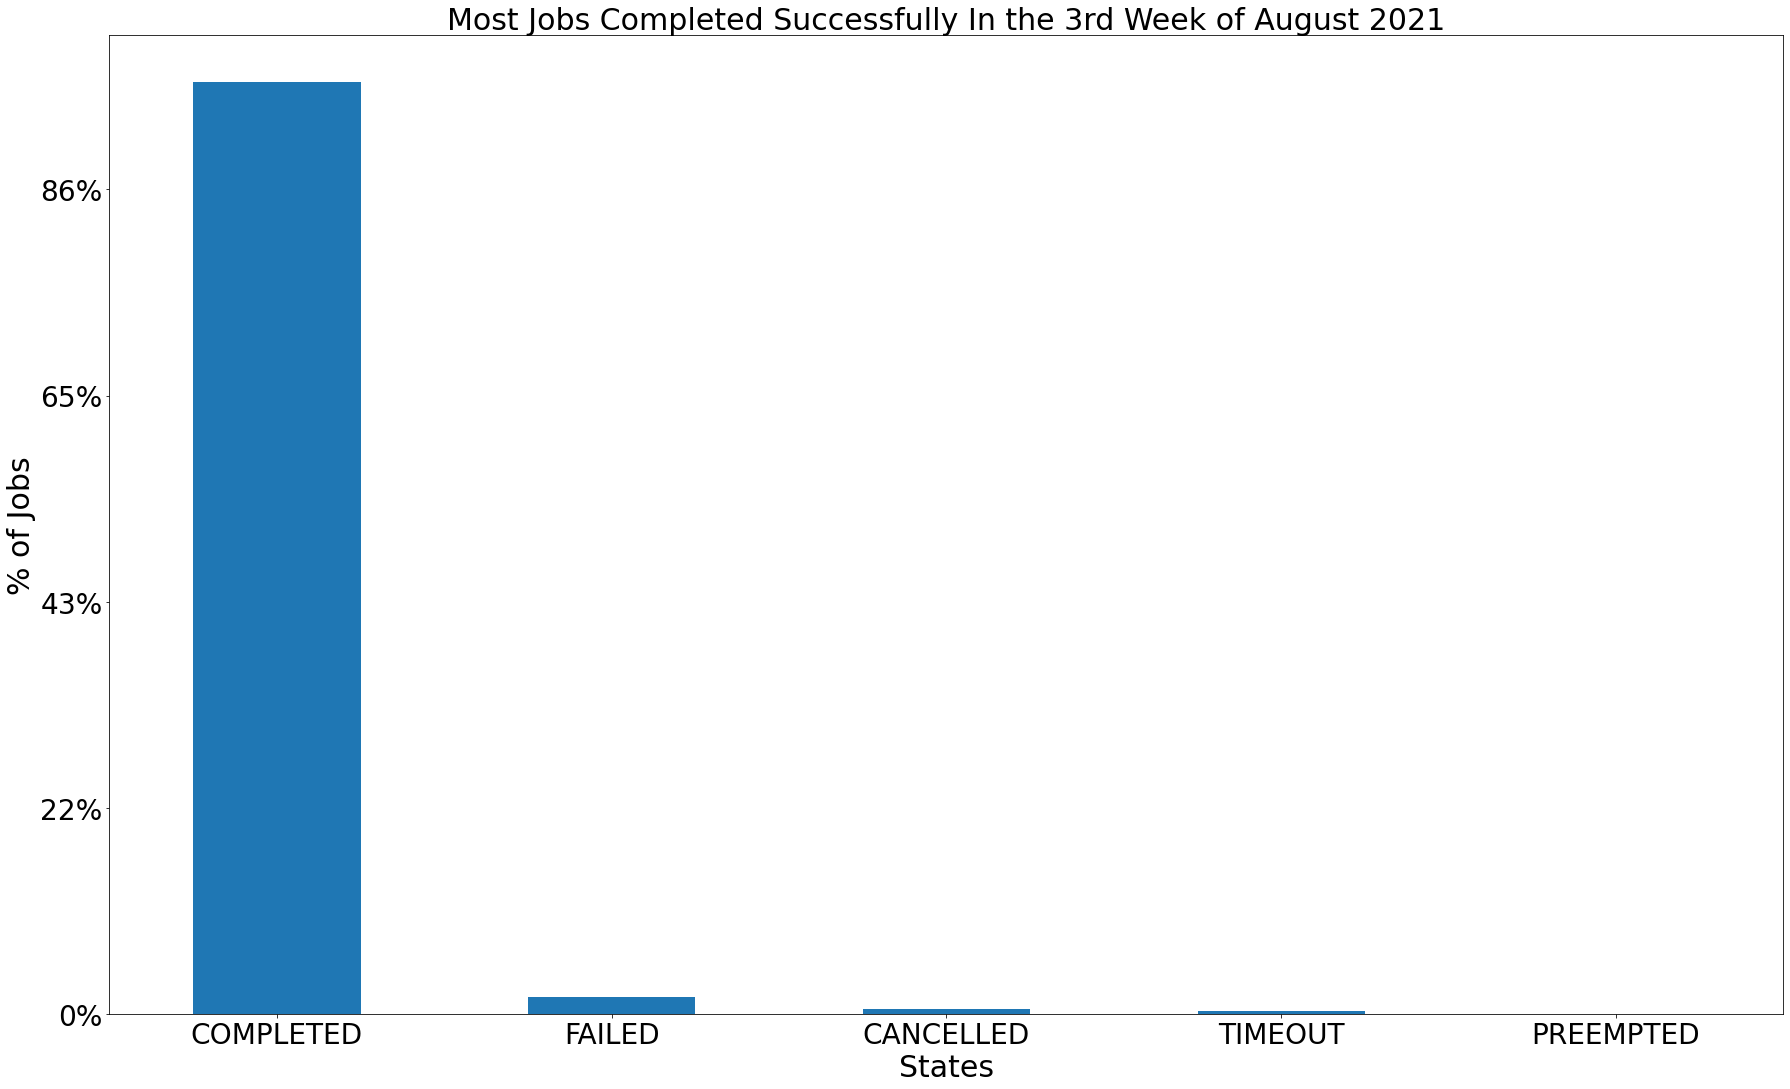

In [9]:
fig, ax = plt.subplots(figsize=(30, 18))
third_week_august_11_am['STATE'].value_counts().plot(kind='bar')

plt.xlabel('States', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 0)

plt.ylabel('% of Jobs', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)

plt.title('Most Jobs Completed Successfully In the 3rd Week of August 2021', fontsize = fontsize)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(third_week_august_11_am['JOBID'].count()));

In [71]:
memory_utilization[memory_utilization > 2]

340705       2.056641
892773       2.375977
892780       4.968262
892801       3.984375
892806       4.516602
              ...    
7381254     19.676953
7381289     31.011621
7388881      5.248425
7388882      7.016907
7394326    155.465625
Length: 200, dtype: float64

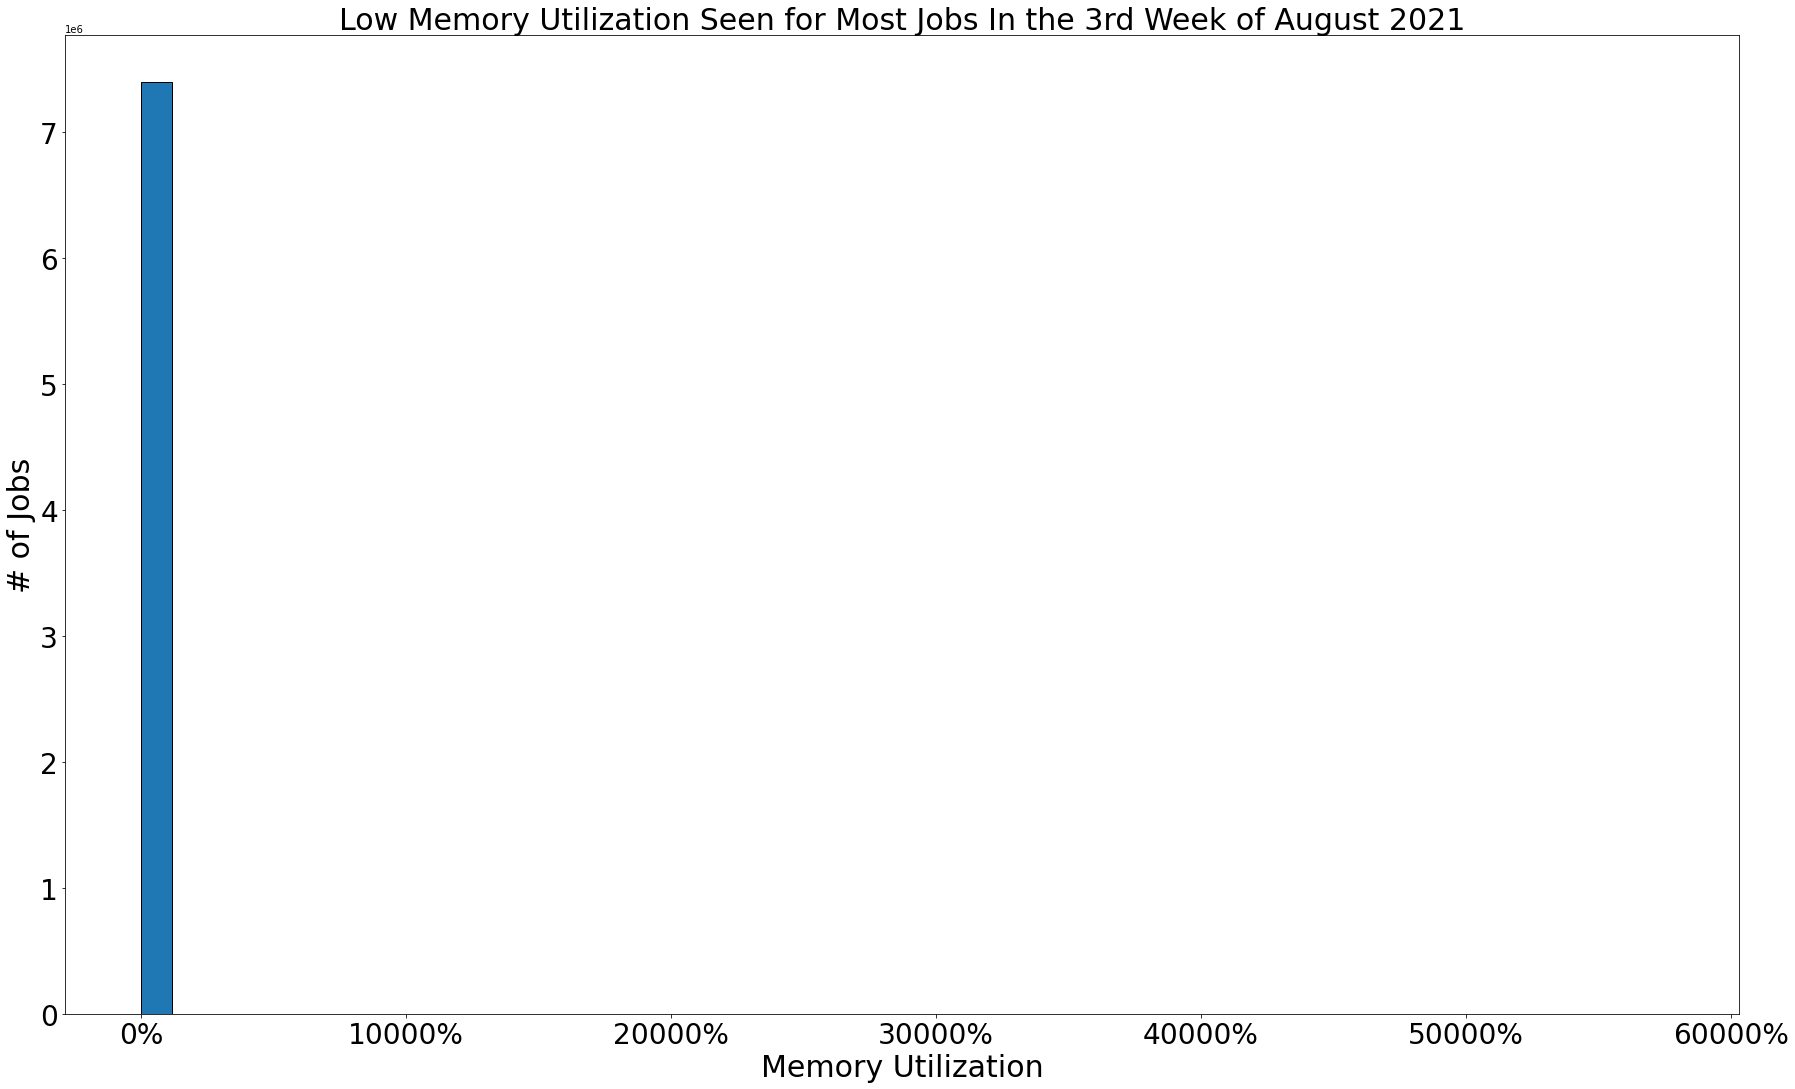

In [72]:
# Calculate memory utilization by dividing total memory used by total required memory
memory_utilization = jobs['USEDMEMTOT']/jobs['REQMEMTOT']

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30, 18))
plt.hist(memory_utilization, bins=50, edgecolor='black')

# Set Axes labels and sizes
plt.xlabel('Memory Utilization', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 0)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('# of Jobs', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)

plt.title("Low Memory Utilization Seen for Most Jobs In the 3rd Week of August 2021", fontsize = fontsize);

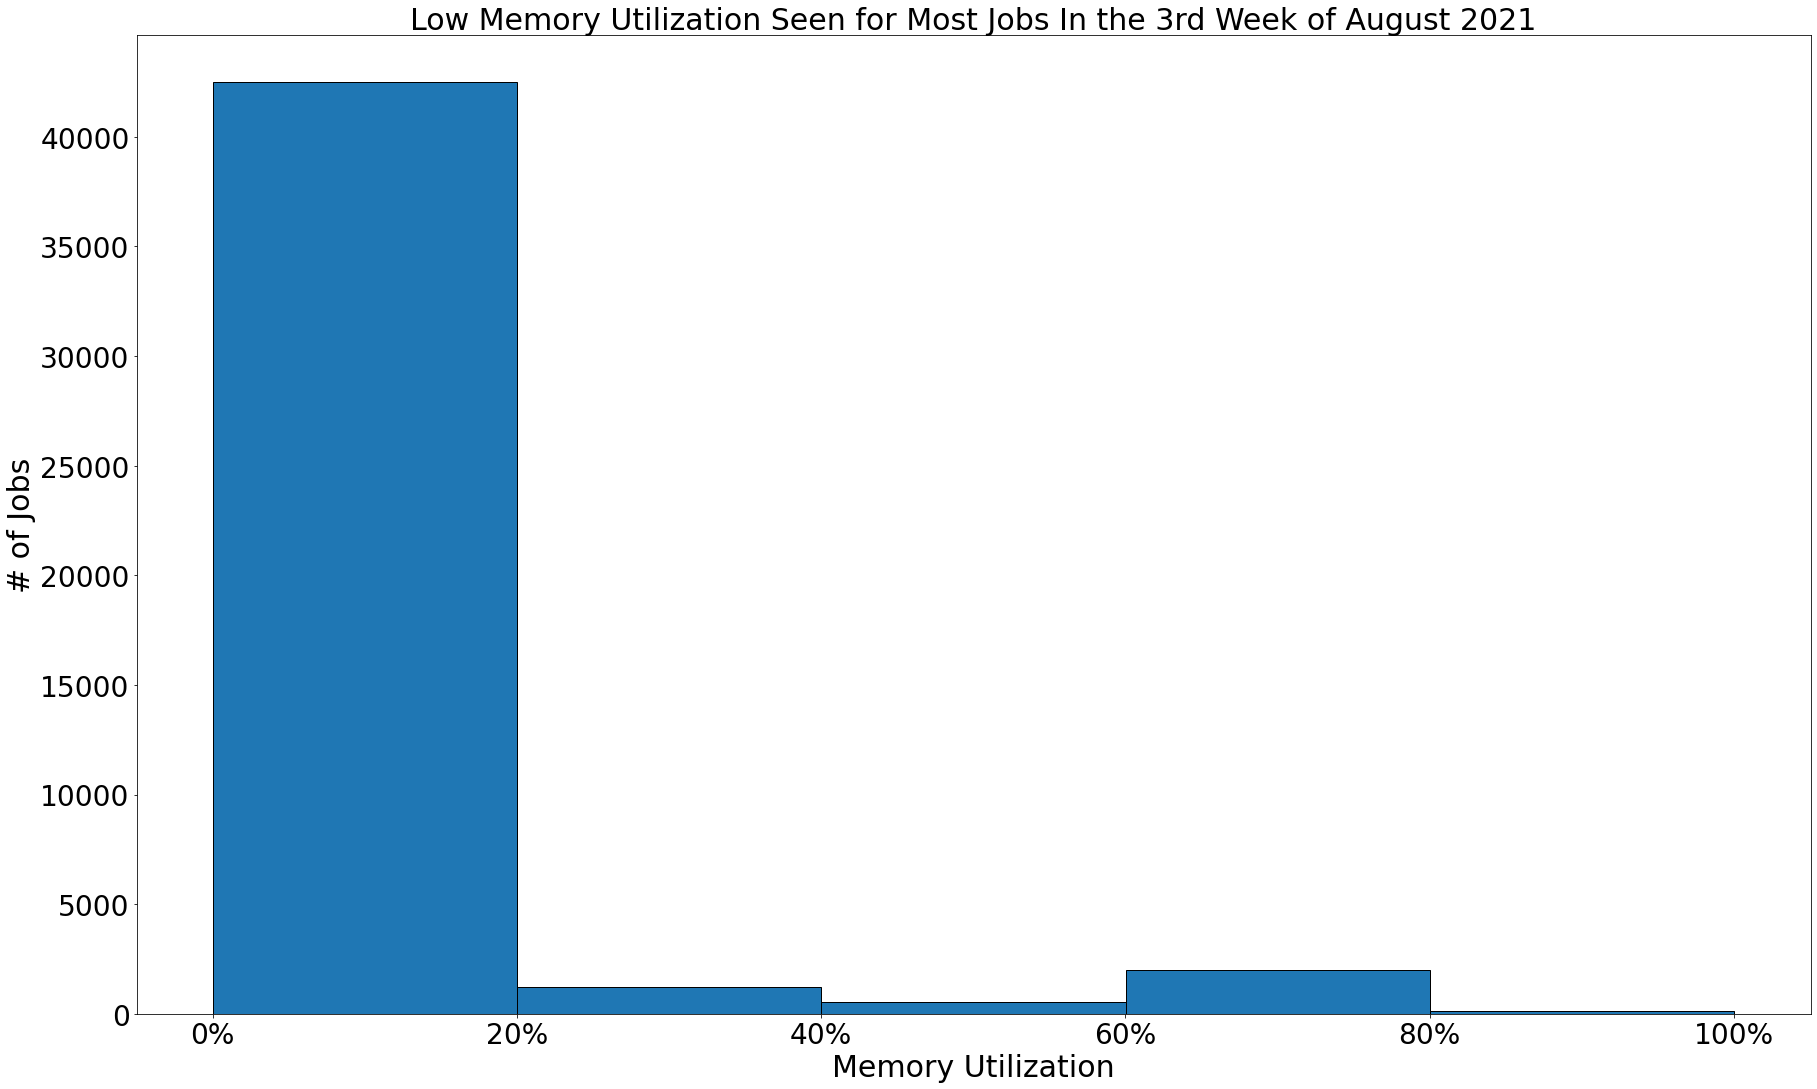

In [10]:
# Calculate memory utilization by dividing total memory used by total required memory
memory_utilization = third_week_august_11_am['USEDMEMTOT']/third_week_august_11_am['REQMEMTOT']

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30, 18))
plt.hist(memory_utilization, bins=5, edgecolor='black')

# Set Axes labels and sizes
plt.xlabel('Memory Utilization', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 0)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('# of Jobs', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)

plt.title("Low Memory Utilization Seen for Most Jobs In the 3rd Week of August 2021", fontsize = fontsize);

In [13]:
jobs['JOBLENGTH'].mean()

Timedelta('0 days 03:48:03.920357488')

In [11]:
third_week_august_11_am['JOBLENGTH'].mean()

Timedelta('0 days 00:25:56.126571089')